In [4]:
!pip install nltk

In [6]:
import nltk

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Load Dataset

In [9]:
import pandas as pd

# .tsv file --- csv와 비슷하지만 comma 대신 tab으로 구분된 file
data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', names= ['label', 'body_text'], header = None)
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [16]:
print('Rows : {} | Spam : {} | Ham : {}'.format(len(data), len(data[data['label'] == 'spam']) , len(data[data['label'] == 'ham'])))

Rows : 5568 | Spam : 746 | Ham : 4822


### Data Preprocessing

In [19]:
# Remove Punctuation : 구두점 
import string

print(string.punctuation)

def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

text = "how are you??"

result = remove_punct(text)
print(result)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
how are you


In [20]:
# Add new Colume in dataframe name body_text_clean
data['body_text_clean'] = data['body_text'].apply(lambda x : remove_punct(x))
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [22]:
# Tokenization --- Seperate texts into units

import re

def tokenize(text):
    tokens = re.split('\W+', text) # W+ means either a word character or a dash can go there
    return tokens

data['body_text_tokenized']  = data['body_text_clean'].apply(lambda x : tokenize(x.lower()))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [23]:
# Remove Stop Words --- in other words ... remove common words like a, an, the, is , ..

stopwords = nltk.corpus.stopwords.words('english')

print(stopwords[:10])
print(len(stopwords))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
179


In [25]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x : remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


In [27]:
# Stemming data --- origin form of words like having -> have , flying -> fly 

ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['text_body_stemmed'] = data['body_text_nostop'].apply(lambda x : stemming(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,text_body_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [29]:
# Lemmatising --- Stemming 보다 느리지만 더 정확하게 어원으로 

wn = nltk.WordNetLemmatizer()

def lemmatising(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatised'] = data['body_text_nostop'].apply(lambda x : lemmatising(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,text_body_stemmed,body_text_lemmatised
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


### Vetorising 

- Process of encoding text as integer (make feature vector)

    1. BOW
    2. N-Gram
    3. TF-IDF

In [35]:
# Bag of Words

import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100) # Extend column width 

stopwords = nltk.corpus.stopwords.words('english') # remove Stop words
ps = nltk.PorterStemmer() # make stem words

data = pd.read_csv('SMSSpamCollection.tsv', sep = '\t' , names = ['label', 'body_text'] , header = None)

def clean_text(text):
    # Remove Punctuation 
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    # make Token
    tokens = re.split('\W+', text) 
    # Remove StopWords and make Stem
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text
    

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer  = clean_text)
X_counts = count_vect.fit_transform(data['body_text'])

'''
print(X_counts.shape) ---  5568 x 8107

행 = Documents
열 = 각 단어 

'''
print(count_vect.get_feature_names()

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [41]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns = count_vect.get_feature_names())
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# N-Grams
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range = (2,2), analyzer = clean_text)
X_counts = ngram_vect.fit_transform(data['body_text'])

print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

C:\Users\USER\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns = ngram_vect.get_feature_names())
X_counts_df.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5568, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

C:\Users\USER\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
X_tfidf_pd = pd.DataFrame(X_tfidf.toarray(), columns = tfidf_vect.get_feature_names())
X_tfidf_pd.head()

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Engineering : Feature Creation 

In [50]:
import string

data['body_len'] = data['body_text'].apply(lambda x : len(x) - x.count(' '))

def count_punct(text):
    count = sum( [1 for char in text if char in string.punctuation ])
    return round(count / (len(text) - text.count(' ')) , 3)* 100

data['punc%'] = data['body_text'].apply(lambda x : count_punct(x))
data.head()

,label,body_text,body_len,punc%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


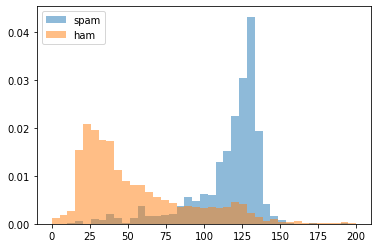

In [51]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

bins = np.linspace(0, 200, 40)

plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha = 0.5 , density = True, stacked = True,label = 'spam')
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha = 0.5, density = True, stacked = True, label = 'ham')
plt.legend(loc = 'upper left')
plt.show()

# Spam 이 ham보다 훨씬 더 많은 단어들을 사용한다.

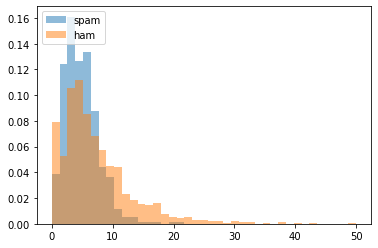

In [53]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label'] == 'spam']['punc%'], bins, alpha = 0.5 , density = True, stacked = True,label = 'spam')
plt.hist(data[data['label'] == 'ham']['punc%'], bins, alpha = 0.5, density = True, stacked = True, label = 'ham')
plt.legend(loc = 'upper left')
plt.show()

### Building ML Classifier : Model Selection

    1. Ensenble
    2. Grid Search
    3. Cross-validation 

In [65]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore', category = DeprecationWarning)

# TF-IDF Data
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'] , data['punc%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)

# BOG
count_vect = CountVectorizer(analyzer = clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punc%'], pd.DataFrame(X_count.toarray())], axis = 1)


In [66]:
X_tfidf_feat.head()

,body_len,punc%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
X_count_feat.head()

,body_len,punc%,0,1,2,3,4,5,6,7,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,160,2.5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
rf = RandomForestClassifier()

param = {'n_estimators' : [10, 150, 300],
         'max_depth' : [30, 60, 90, None]}


gs = GridSearchCV(rf, param, cv = 5, n_jobs = 4)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False).head()

C:\Users\USER\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,32.260691,2.030850,0.268569,0.021360,None,300,"{'max_depth': None, 'n_estimators': 300}",0.975763,0.974865,0.974865,0.967655,0.972147,0.973059,0.002962,1
10,17.654238,0.135631,0.211805,0.010533,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.975763,0.973968,0.968553,0.969452,0.972879,0.003294,2
7,15.972603,0.216687,0.222520,0.023076,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.974865,0.973968,0.968553,0.966757,0.972340,0.004044,3
6,1.924140,0.040740,0.110909,0.009241,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.971275,0.973968,0.972172,0.966757,0.973944,0.971623,0.002645,4
8,31.049680,0.351013,0.296121,0.022406,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.975763,0.973070,0.973070,0.966757,0.969452,0.971622,0.003154,5


In [69]:
rf = RandomForestClassifier()

param = {'n_estimators' : [10, 150, 300],
         'max_depth' : [30, 60, 90, None]}


gs = GridSearchCV(rf, param, cv = 5, n_jobs = 4)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False).head()

C:\Users\USER\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,16.042520,0.079473,0.191478,0.010420,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.981149,0.977558,0.974865,0.968553,0.973944,0.975214,0.004167,1
11,35.229244,3.041805,0.285599,0.048863,None,300,"{'max_depth': None, 'n_estimators': 300}",0.976661,0.977558,0.973968,0.968553,0.971249,0.973598,0.003352,2
6,1.935405,0.027423,0.113801,0.010683,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.974865,0.982047,0.974865,0.971249,0.964960,0.973597,0.005563,3
8,31.166619,0.376586,0.286070,0.023039,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.975763,0.974865,0.968553,0.969452,0.973418,0.003804,4
10,18.379995,1.172318,0.226481,0.027190,None,150,"{'max_depth': None, 'n_estimators': 150}",0.976661,0.977558,0.971275,0.967655,0.972147,0.973059,0.003645,5


In [70]:
data = pd.read_csv('./data/movie_data.csv', sep = ',', names = ['review', 'sentiment'], header = None)
print(data.head())


                                                                                                review  \
0                                                                                               review   
1  I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit ...   
2  Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", w...   
3  As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's...   
4  I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creati...   

   sentiment  
0  sentiment  
1          1  
2          1  
3          1  
4          1  


In [2]:
import nltk
import numpy as np
import pandas as pd
import string
import re
import matplotlib.pyplot as plt

import warnings
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Load Dataset
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv('./data/movie_data.csv', sep = ',')

data = data.sample(frac = 1)
data = data[:500]

In [4]:
#Processing
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.WordNetLemmatizer()

def clean_text(text):
    # Remove Punctuation
    text = ''.join([word.lower() for word in text if word not in string.punctuation])
    # make Token
    tokens = re.split('\W+', text)
    # Remove StopWords and make Stem
    text = [ps.lemmatize(word) for word in tokens if word not in stopwords]
    return text

# Vectorization -- TF-IDF 사용해보자
TFIDF_Vect = TfidfVectorizer(analyzer = clean_text)
X_TFIDF = TFIDF_Vect.fit_transform(data['review'])
X_TFIDF_pd = pd.DataFrame(X_TFIDF.toarray(), columns = TFIDF_Vect.get_feature_names())

C:\Users\USER\anaconda3\envs\torch_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
warnings.filterwarnings('ignore', category = DeprecationWarning)

rf = RandomForestClassifier()
param = {'n_estimators' : [10, 150, 300],
         'max_depth' : [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv = 5, n_jobs = 4)
gs_fit = gs.fit(X_TFIDF_pd, data['sentiment'])
result1 = pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False).head())

In [5]:
svc = SVC(kernel = 'rbf' , probability=True)
param = {'gamma' : [0.1, 0.5, 1],
         'C' : [1, 5, 10]}

gs2 = GridSearchCV(svc, param, cv = 5, n_jobs = 4)
gs_fit2 = gs2.fit(X_TFIDF_pd, data['sentiment'])
result2 = pd.DataFrame(gs_fit2.cv_results_).sort_values('mean_test_score', ascending = False).head()

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
2      56.524472      5.195961         5.756372        0.701491       5   
3      59.492558      0.261674         6.012214        0.339322       5   
1      61.335530      0.805405         6.645065        0.209664       1   
0      57.665804      2.701728         5.599381        1.200460       1   

  param_gamma                  params  split0_test_score  split1_test_score  \
2         0.1  {'C': 5, 'gamma': 0.1}           0.790419           0.790419   
3         0.5  {'C': 5, 'gamma': 0.5}           0.796407           0.802395   
1         0.5  {'C': 1, 'gamma': 0.5}           0.772455           0.772455   
0         0.1  {'C': 1, 'gamma': 0.1}           0.502994           0.502994   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  
2           0.807229         0.796022        0.007924                1  
3           0.789157         0.795986        0.005413                2  
1        

In [6]:
gbc = GradientBoostingClassifier()
param = {'n_estimators' : [100, 300, 500]}

gs3 = GridSearchCV(gbc, param, cv = 5, n_jobs = 4)
gs_fit3 = gs3.fit(X_TFIDF_pd, data['sentiment'])
result3 = pd.DataFrame(gs_fit3.cv_results_).sort_values('mean_test_score', ascending = False).head()

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1      29.635545      0.327500           0.1215        0.004501   
0       2.683498      0.025499           0.1470        0.012998   

  param_n_estimators                 params  split0_test_score  \
1                150  {'n_estimators': 150}              0.680   
0                 10   {'n_estimators': 10}              0.652   

   split1_test_score  mean_test_score  std_test_score  rank_test_score  
1              0.672            0.676           0.004                1  
0              0.676            0.664           0.012                2  
